### 1)Хасиев Давид Георгиевич

### 2)Evaluating Classification Models in Python

### 3)https://towardsdatascience.com/evaluating-classification-models-in-python-6b5277e3d524

### 4) Я выбрал эту статью потому что мне было интересно.
###      Фактически все.
###      Обучать модель и делать прогноз на основе тестовых данных.

# Оценка моделей классификации в Python
## Понимание показателей эффективности классификации

Классификация машинного обучения - это тип обучения с учителем, в котором алгоритм сопоставляет набор входных данных с дискретным выходом. Классификационные модели имеют широкий спектр применения в различных отраслях и являются одной из основ контролируемого обучения. Это связано с тем, что в разных отраслях многие аналитические вопросы могут быть сформулированы в терминах сопоставления входных данных с дискретным набором выходных данных. Простота определения проблемы классификации делает модели классификации универсальными и независимыми от отрасли.

Machine learning classification is a type of supervised learning in which an algorithm maps a set of inputs to discrete output. Classification models have a wide range of applications across disparate industries and are one of the mainstays of supervised learning. This is because, across industries, many analytical questions can be framed in terms of mapping inputs to a discrete set of outputs. The simplicity of defining a classification problem makes classification models versatile and industry agnostic.

Важная часть в построении моделей оценка эффективности модели. Короче говоря, специалистам по обработке данных нужен надежный способ приблизительно проверить, насколько хорошо модель предсказывает результат. Для оценки производительности модели доступно множество инструментов; в зависимости от проблемы, которую вы пытаетесь решить, некоторые из них могут быть более полезнее, чем другие.

An important part of building classification models is evaluating model performance. In short, data scientists need a reliable way to test approximately how well a model will correctly predict an outcome. Many tools are available for evaluating model performance; depending on the problem you’re trying to solve, some may be more useful than others.

Здесь мы рассмотрим задачу построения простой классификационной модели, которая предсказывает вероятность оттока клиентов. Отток определяется как событие, когда клиент покидает компанию, отказывается от подписки или больше не совершает покупки по истечении определенного периода времени. Мы будем работать с данными Telco Churn, которые содержат информацию о вымышленной телекоммуникационной компании. Наша задача - предсказать, покинет ли клиент компанию, и оценить, насколько хорошо наша модель справляется с этой задачей.

Here, we will consider the task of building a simple classification model that predicts the probability of customer churn. Churn is defined as the event of a customer leaving a company, unsubscribing or no longer making a purchase after a period of time. We will be working with the Telco Churn data, which contains information about a fictional telecom company. Our tasks will be to predict whether or not the customer will leave the company and evaluate how well our model performs this task.

# Building a Classification Model


Начнем с чтения данных об оттоке Telco в фрейм данных Pandas:
(Let’s start by reading the Telco Churn data into a Pandas dataframe:)

In [ ]:
df = pd.read_csv ('telco_churn.csv')

Теперь давайте отобразим первые пять строк данных:
(Now, let’s display the first five rows of data:)

In [ ]:
df.head ()

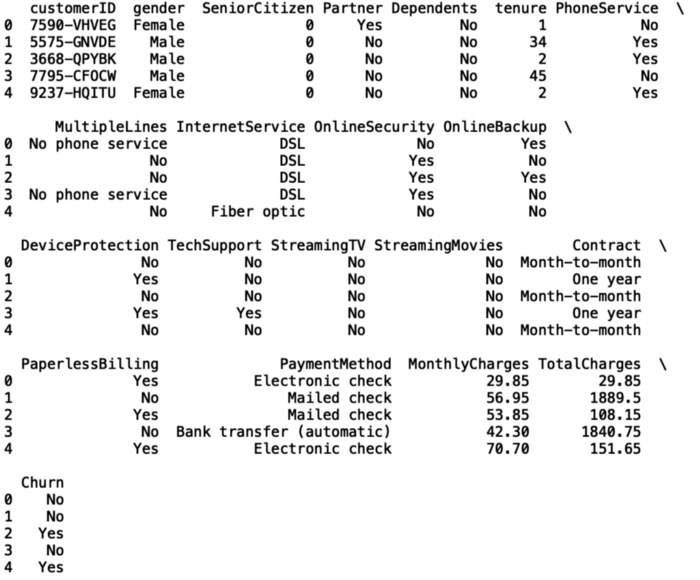

In [2]:
from IPython.display import Image
Image("Pictures/0_K8QF34bac9bpQLTX.png")

Мы видим, что набор данных содержит 21 столбец с категориальными и числовыми значениями. Данные также содержат 7 043 строки, что соответствует 7 043 уникальным клиентам.

We see that the data set contains 21 columns with both categorical and numerical values. The data also contains 7,043 rows, which corresponds to 7,043 unique customers.

Давайте построим простую модель, которая учитывает срок службы, который представляет собой продолжительность пребывания клиента в компании, и MonthlyCharges в качестве входных данных и прогнозирует вероятность ухода клиента. Выходной столбец будет столбцом оттока, который имеет значение либо да, либо нет.

Let’s build a simple model that takes tenure, which is the length of time the customer has been with the company and MonthlyCharges as inputs and predicts the probability of the customer churning. The output column will be the Churn column, which has a value of either yes or no.

Во-первых, давайте изменим наш целевой столбец, чтобы он имел машиночитаемые двоичные значения. Мы присвоим столбцу Churn значение 1, если да, и ноль, если нет. Мы можем добиться этого, используя метод where () из numpy:

First, let’s modify our target column to have machine-readable binary values. We’ll give the Churn column a value of one for yes and zero for no. We can achieve this by using the where() method from numpy:

In [ ]:
import numpy as np

In [ ]:
df ['Churn'] = np.where (df ['Churn'] == 'Да', 1, 0)

Затем давайте определим наш ввод и вывод:

Next, let’s define our input and output:

In [ ]:
X = df [['tenure', 'MonthlyCharges']]

In [ ]:
y = df ["Churn"]

Затем мы можем разделить наши данные для обучения и тестирования. Для этого нам нужно импортировать метод train_test_split из модуля model_selection в sklearn. Давайте сгенерируем обучающий набор, который составляет 67 процентов наших данных, а затем воспользуемся оставшимися данными для тестирования. Набор для тестирования состоит из 2325 точек данных:

We then can split our data for training and testing. To do this, we need to import the train_test_split method from the model_selection module in sklearn. Let’s generate a training set that makes up 67 percent of our data, and then use the remaining data for testing. The testing set is made up of 2,325 data points:

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

Для нашей модели классификации воспользуемся простой моделью логистической регрессии. Давайте импортируем класс LogisticRegression из модуля linear_models в Sklearn:

For our classification model, let’s use a simple logistic regression model. Let’s import the LogisticRegression class from the linear_models module in Sklearn:

In [ ]:
from sklearn.linear_models import LogisticRegression

Теперь давайте определим экземпляр нашего класса логистической регрессии и сохраним его в переменной clf_model. Затем мы приспособим нашу модель к нашим обучающим данным:

Now, let’s define an instance of our logistic regression class and store it in a variable called clf_model. We will then fit our model to our training data:

In [ ]:
clf_model = LogisticRegression()

In [ ]:
clf_model.fit(X_train, y_train)

Наконец, мы можем делать прогнозы на основе тестовых данных и сохранять прогнозы в переменной y_pred:

Finally, we can make predictions on the test data and store the predictions in a variable called y_pred:

In [ ]:
y_pred = clf_model.predict (X_test)

Теперь, мы обучили модель и сделали прогноз на основе тестовых данных.Можете гордиться собой!

Now that we have trained the model and made a prediction based on the test data, you can be proud of yourself!